In [2]:
import warnings 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import accuracy_score, classification_report
warnings.filterwarnings('ignore') 


In [4]:
df=pd.read_csv("C:\\Users\\aneet\\Downloads\\Employee.csv")

In [5]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [6]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [7]:
print("The shape =", df.shape)
num_rows, num_cols = df.shape
num_features = num_cols - 1
num_data = num_rows * num_cols
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")

The shape = (148, 6)
Number of Rows: 148
Number of Columns: 6
Number of Features: 5
Number of All Data: 888


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [9]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,130.0,30.48,11.10,0.0,22.0,32.5,37.75,54.0
Salary,124.0,5312.47,2573.76,1089.0,3030.0,5000.0,8000.00,9876.0
Gender,148.0,0.22,0.42,0.0,0.0,0.0,0.00,1.0


In [10]:
df.describe(include=object)

,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


In [11]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [12]:
df.isnull().sum()/df.shape[0]*100

Company     5.405405
Age        12.162162
Salary     16.216216
Place       9.459459
Country     0.000000
Gender      0.000000
dtype: float64

In [13]:
df.duplicated().sum()

4

In [14]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*15)

Company
TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64
*********************************************
Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64
*********************************************
Country
India    148
Name: count, dtype: int64
*********************************************


No Garbage Values

## Graphical Representation

Gender
0    115
1     33
Name: count, dtype: int64


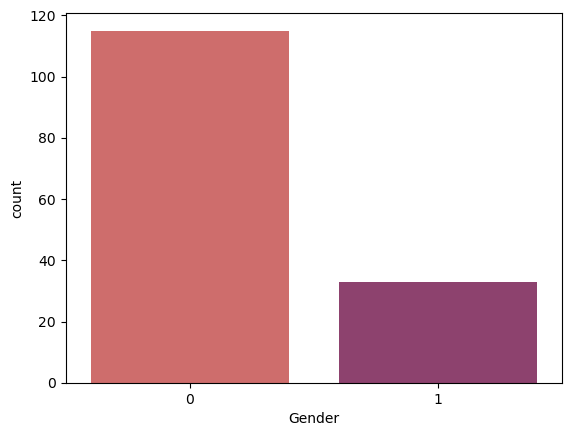

In [16]:
GenderAnalysis = df.Gender.value_counts(dropna=False)
print(GenderAnalysis)
sns.countplot(x="Gender", data=df, palette="flare")
plt.show()

Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
NaN           14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


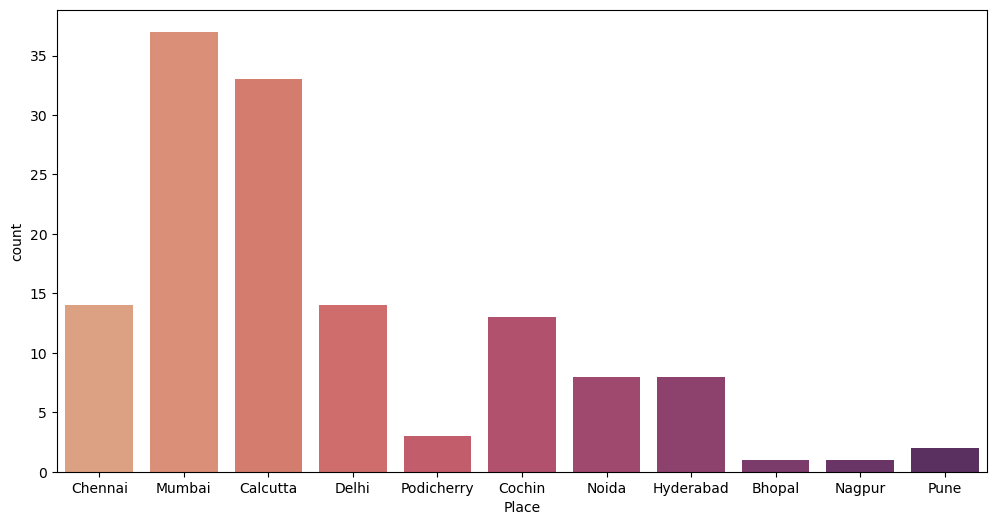

In [17]:
PlaceAnalysis = df.Place.value_counts(dropna=False)
print(PlaceAnalysis)

plt.figure(figsize=(12, 6)) 

sns.countplot(x="Place", data=df, palette="flare")
plt.show()

Company
TCS                          53
Infosys                      45
CTS                          36
NaN                           8
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64


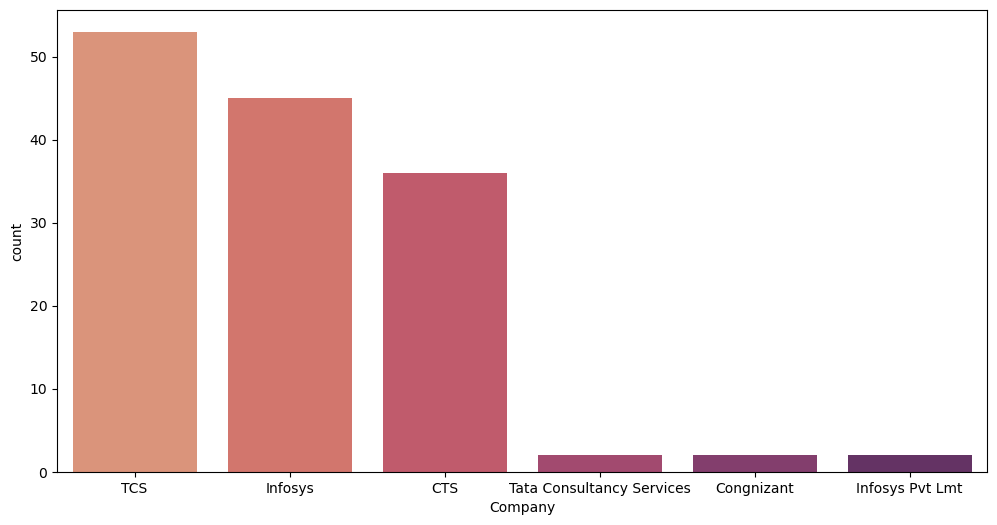

In [18]:
CompanyAnalysis = df.Company.value_counts(dropna=False)
print(CompanyAnalysis)
plt.figure(figsize=(12, 6)) 
sns.countplot(x="Company", data=df, palette="flare")
plt.show()

Salary
NaN       24
3000.0     9
5000.0     6
4034.0     5
5034.0     5
8202.0     5
7084.0     4
5835.0     4
8787.0     4
2934.0     4
2034.0     4
2300.0     4
9284.0     4
8345.0     4
8943.0     4
3184.0     4
4824.0     4
9024.0     4
3045.0     4
1234.0     4
1089.0     4
8000.0     3
3030.0     3
6000.0     3
9000.0     3
7000.0     3
3234.0     2
9876.0     2
7654.0     2
4000.0     2
4345.0     1
6544.0     1
6543.0     1
4324.0     1
5435.0     1
5555.0     1
3454.0     1
5654.0     1
5009.0     1
5098.0     1
3033.0     1
Name: count, dtype: int64


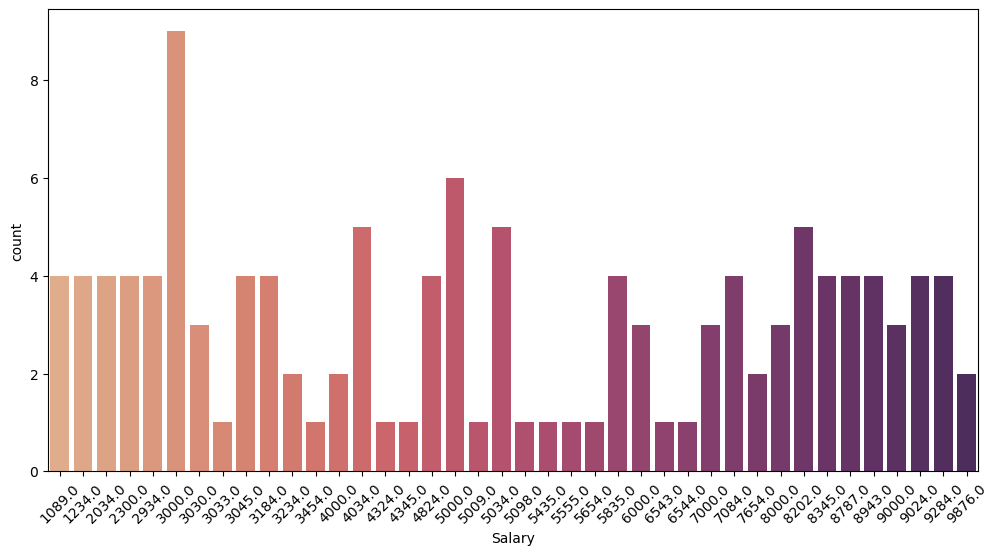

In [19]:
SalaryAnalysis = df.Salary.value_counts(dropna=False)
print(SalaryAnalysis)
plt.figure(figsize=(12, 6))  

sns.countplot(x="Salary", data=df, palette="flare")
plt.xticks(rotation=45)

plt.show()

In [20]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [21]:
df.describe(include="object")

,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


The Average Salary: 5312.47 
The ratio of people with income above average to below average: 77.14 
Number of people income above the average: 54
Number of people income below the average: 70


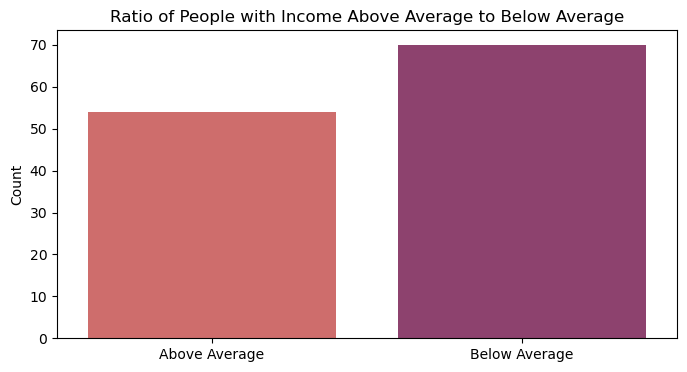

In [22]:
# Calculate the average income
average_Salary = df['Salary'].mean()
print(f"The Average Salary: {average_Salary:.2f} ")

# Count incomes higher and lower than average
above_average_count = (df['Salary'] > average_Salary).sum()
below_average_count = (df['Salary'] <= average_Salary).sum()

# Calculate ratio and print the results
ratio = above_average_count / below_average_count
print(f"The ratio of people with income above average to below average: {ratio*100:.2f} ")
print(f"Number of people income above the average: {above_average_count}")
print(f"Number of people income below the average: {below_average_count}")

# Plot the ratio using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x=['Above Average', 'Below Average'], y=[above_average_count, below_average_count], palette="flare")
plt.title('Ratio of People with Income Above Average to Below Average')
plt.ylabel('Count')
plt.show()

In [23]:
sns.set_theme(palette="flare")

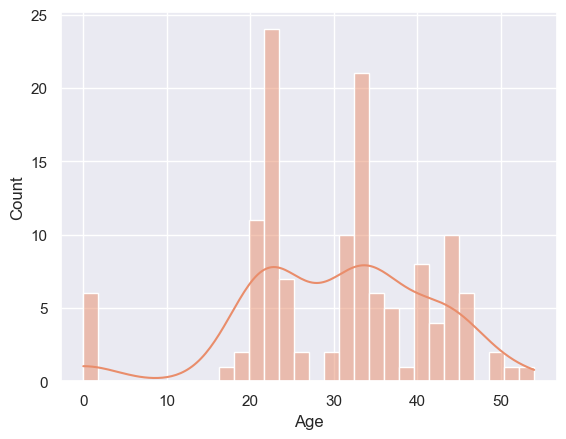

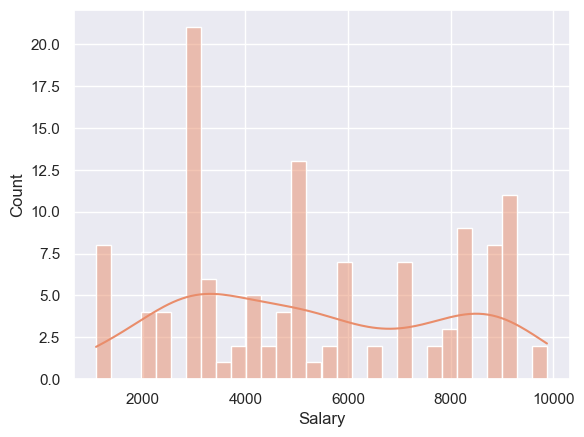

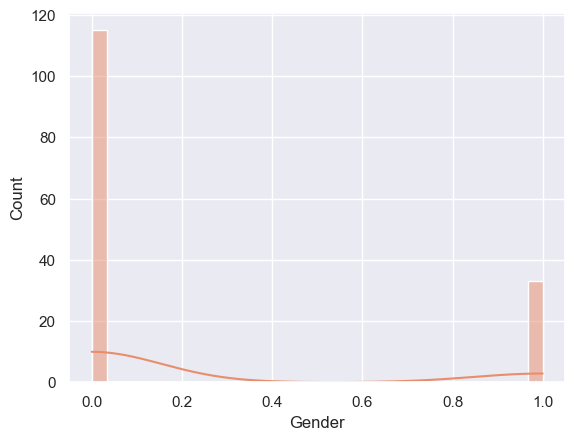

In [24]:
import warnings as wr
wr.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,bins=30,kde='True')
  plt.show()

## Correlation Analysis

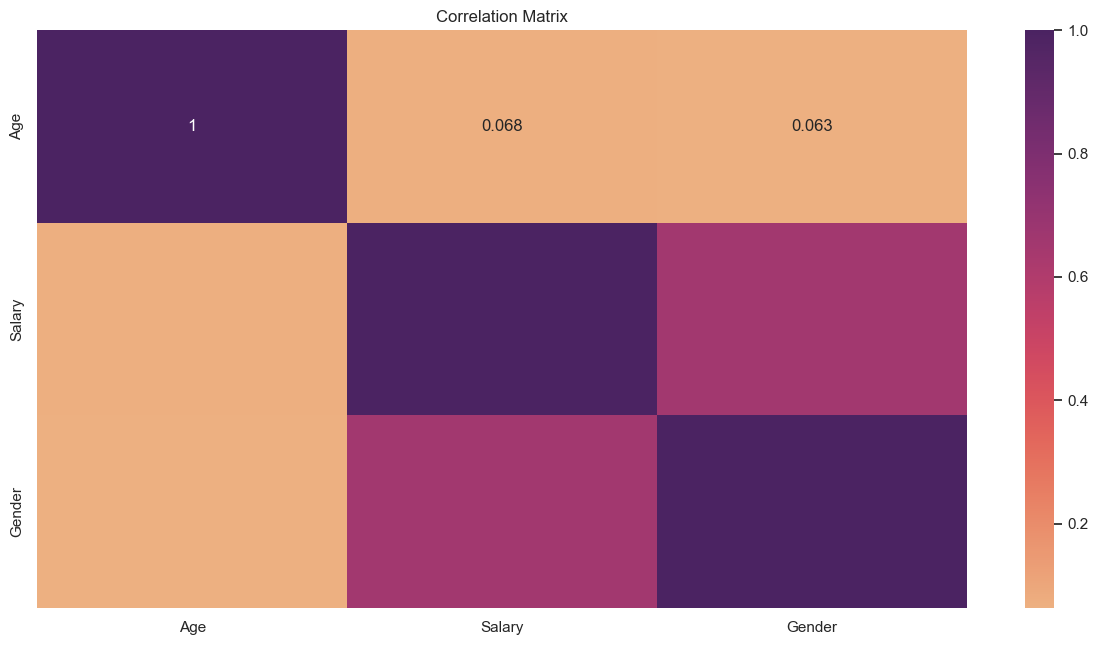

In [25]:
# Correlation matrix using heatmap
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(15, 7.5))
sns.heatmap(correlation_matrix, annot=True, cmap='flare')
plt.title('Correlation Matrix')

plt.show()

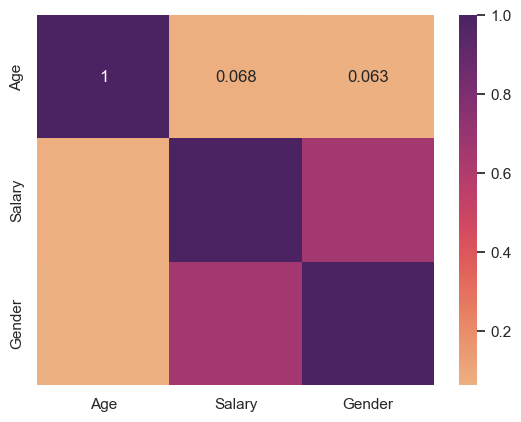

In [27]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='flare')
plt.show()

#### There is positive correlation between Salary and Age

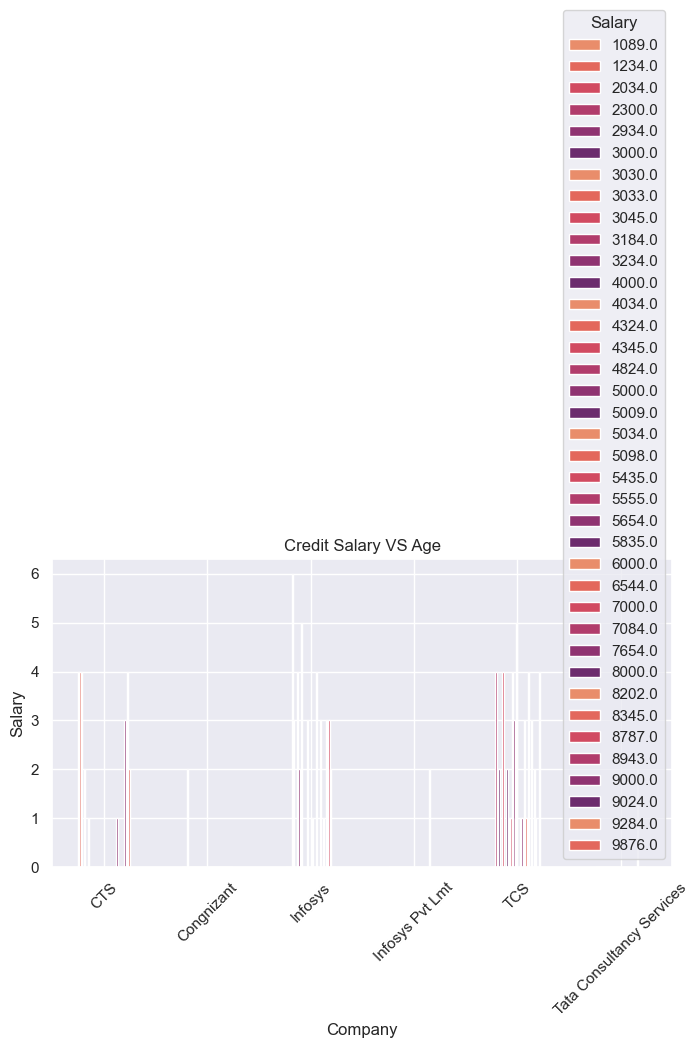

In [28]:
pd.crosstab(df.Company, df.Salary).plot(kind="bar", figsize=(8, 4))
plt.title('Credit Salary VS Age')
plt.xlabel('Company')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

Infosis giving highest salary

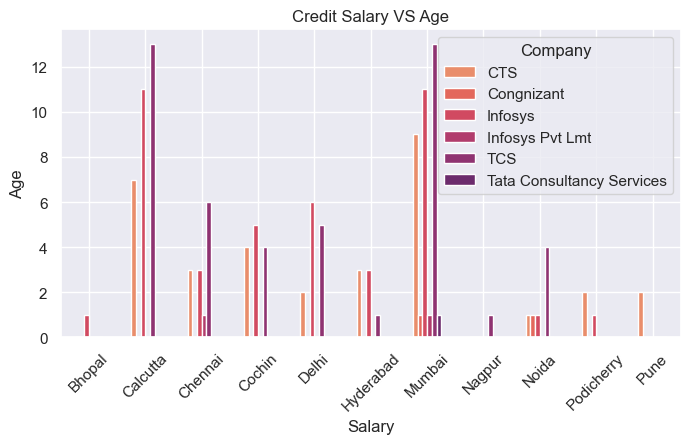

In [29]:
pd.crosstab(df.Place, df.Company).plot(kind="bar", figsize=(8, 4))
plt.title('Credit Salary VS Age')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

In [30]:
null_counts = df.isnull().sum()
print(null_counts)

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [32]:
df["Salary"] = df["Salary"].fillna(df["Salary"].mean())
df["Age"] = df["Age"].fillna(df["Age"].mean())


#1- Median Imputation:

df["Agre"] = df["Age"].fillna(df["Age"].median())

# 2- Mode Imputatoin: for categorical data :
df["Company"] = df["Company"].fillna(df["Company"].mode()[0])
# Fill the missing values for categorical data.
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Place"] = df["Place"].fillna(df["Place"].mode()[0])


In [33]:
null_counts = df.isnull().sum()
print(null_counts)
print("_________________________________________________________________")

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
Agre       0
dtype: int64
_________________________________________________________________


#### There is no null values in the  dataset 

## Encoding Categorical Variables

In [34]:
df_one_hot_encoded = pd.get_dummies(data = df, columns = ["Place", "Company"])

print(df_one_hot_encoded )

print("The shape =",df.shape)
print("_______________________________________________")

      Age       Salary Country  Gender  Agre  Place_Bhopal  Place_Calcutta  \
0    20.0  5312.467742   India       0  20.0         False           False   
1    30.0  5312.467742   India       0  30.0         False           False   
2    35.0  2300.000000   India       0  35.0         False            True   
3    40.0  3000.000000   India       0  40.0         False           False   
4    23.0  4000.000000   India       0  23.0         False           False   
..    ...          ...     ...     ...   ...           ...             ...   
143  33.0  9024.000000   India       1  33.0         False            True   
144  22.0  8787.000000   India       1  22.0         False            True   
145  44.0  4034.000000   India       1  44.0         False           False   
146  33.0  5034.000000   India       1  33.0         False           False   
147  22.0  8202.000000   India       0  22.0         False           False   

     Place_Chennai  Place_Cochin  Place_Delhi  ...  Place_Nagpu

## Handling outliers

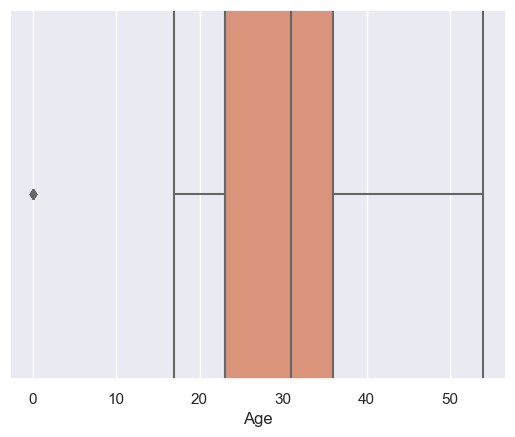

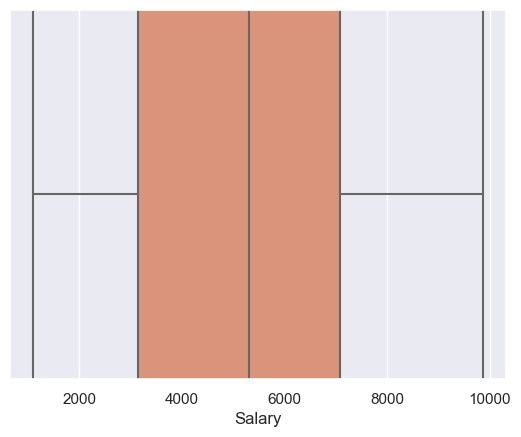

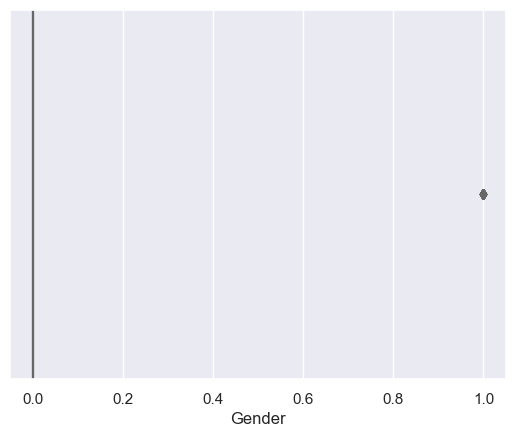

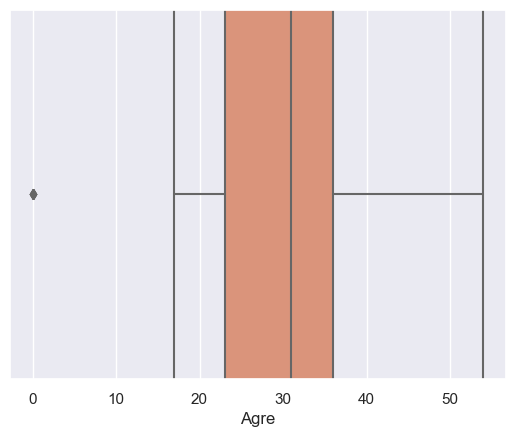

In [35]:
# Visualization data numerical values
import warnings as wr
wr.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i,width=1000)
  plt.show()

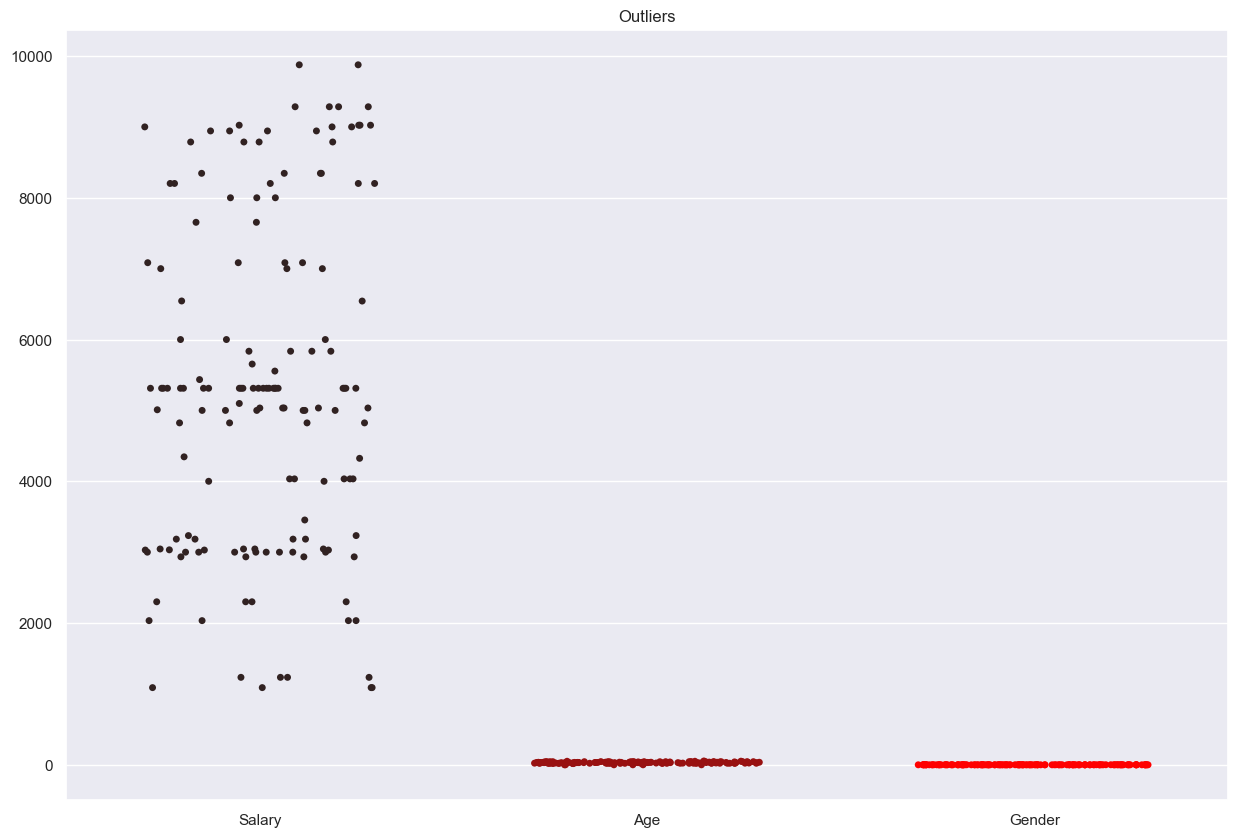

In [36]:
plt.figure(figsize=(15, 10))

outliersColumns = df.get(["Salary", "Age", "Gender"])

sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

plt.title("Outliers")

plt.show()

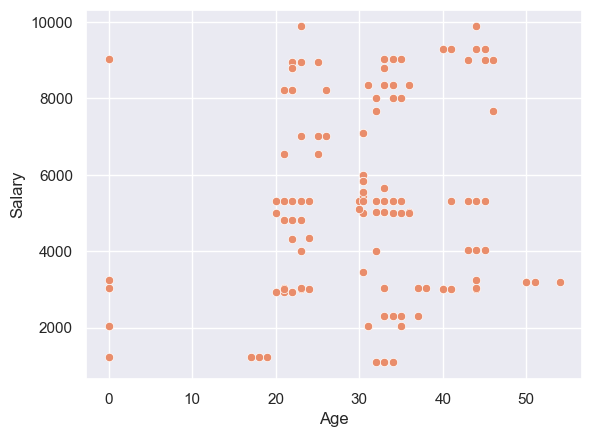

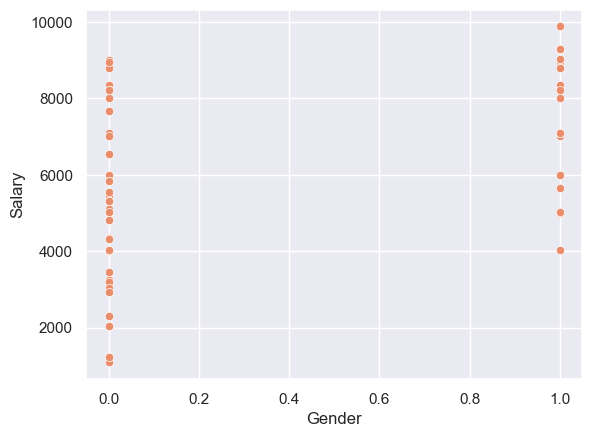

In [37]:

for i in ['Age', 'Gender']:
   sns.scatterplot(data=df,x=i,y='Salary')
   plt.show()

In [38]:
df.select_dtypes(include="number").columns


Index(['Age', 'Salary', 'Gender', 'Agre'], dtype='object')

In [39]:
s=df.select_dtypes(include='number').corr()

<Axes: >

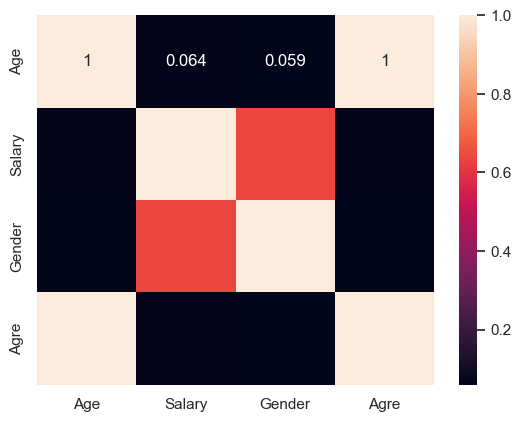

In [40]:
sns.heatmap(s,annot=True)


## Outliers Treatment

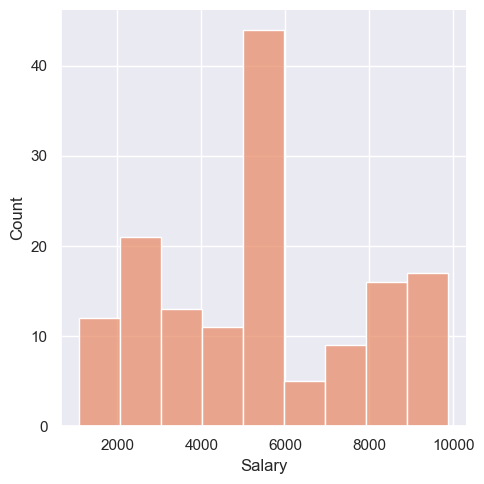

In [41]:
sns.displot(df['Salary'])


<Axes: >

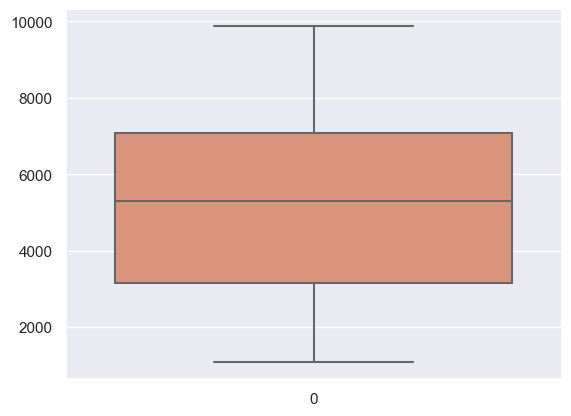

In [42]:
sns.boxplot(df['Salary'])


#### No major  outliers detected.Thus, no need of outlier handling

In [43]:
def whisker(col):
   q1,q3=np.percentile(col,[5,95])
   iqr=q3-q1
   lw=q1-1.5*iqr
   uw=q3+1.5*iqr
   return lw,uw,iqr

In [44]:
whisker(df['Age'])


(-21.624999999999993, 84.975, 26.65)

In [45]:
for i in('Salary','Age','Gender'):
    lw,uw,iq=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]<uw,uw,df[i])
    print(lw,uw,iq)

-9751.0 20289.0 7510.0
-21.624999999999993 84.975 26.65
-1.5 2.5 1.0


In [48]:
df.columns


Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender', 'Agre'], dtype='object')

## Z-Score Method

In [49]:
upper_limit=df['Age'].mean()+3*df['Age'].std()
lower_limit=df['Age'].mean()-3*df['Age'].std()
print("upper_limit:",upper_limit, "\nlower_limit",lower_limit)

upper_limit: 84.9750000000007 
lower_limit 84.97499999999934


In [50]:
df.loc[(df['Salary']>upper_limit) | (df['Salary']<lower_limit)]

,Company,Age,Salary,Place,Country,Gender,Agre
0,TCS,84.975,20289.0,Chennai,India,2.5,20.0
1,Infosys,84.975,20289.0,Mumbai,India,2.5,30.0
2,TCS,84.975,20289.0,Calcutta,India,2.5,35.0
3,Infosys,84.975,20289.0,Delhi,India,2.5,40.0
4,TCS,84.975,20289.0,Mumbai,India,2.5,23.0
...,...,...,...,...,...,...,...
143,TCS,84.975,20289.0,Calcutta,India,2.5,33.0
144,Infosys,84.975,20289.0,Calcutta,India,2.5,22.0
145,Infosys,84.975,20289.0,Delhi,India,2.5,44.0
146,TCS,84.975,20289.0,Mumbai,India,2.5,33.0


In [51]:
new_def= df.loc[(df['Salary']<upper_limit) | (df['Salary']>lower_limit)]
print("Old Data:",len(df))
print("New Data:",len(new_def))

Old Data: 148
New Data: 148


<Axes: >

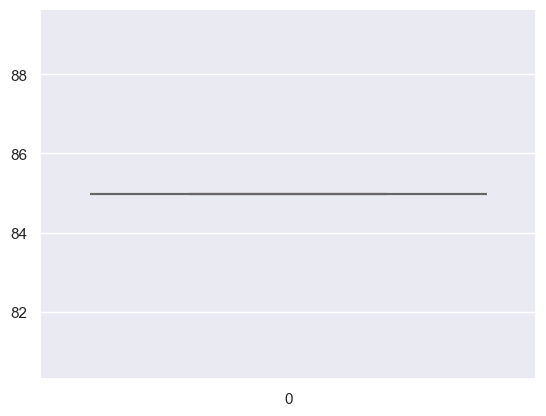

In [52]:
sns.boxplot(df['Age'])


In [53]:
new_def=df.copy()
new_def.loc[new_def['Salary']>upper_limit,'Salary']=upper_limit
new_def.loc[new_def['Salary']>lower_limit,'Salary']=lower_limit

<Axes: >

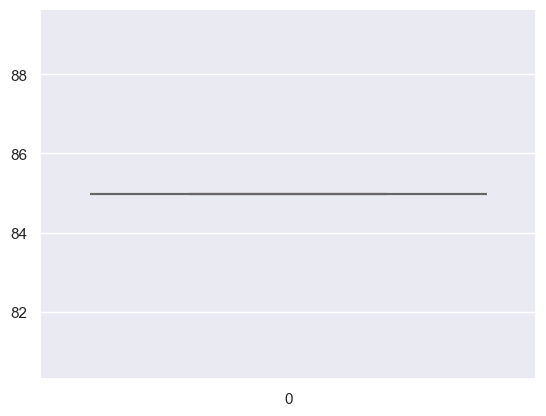

In [54]:
sns.boxplot(new_def['Salary'])


<Axes: >

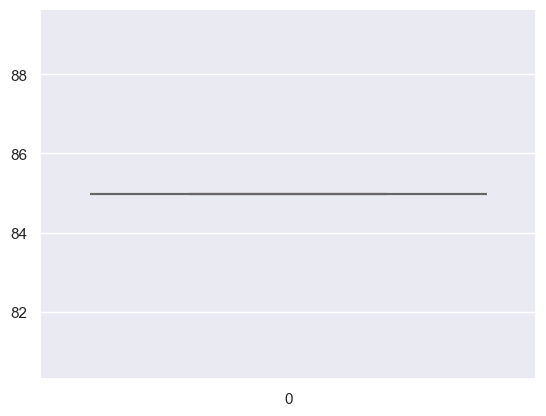

In [55]:
new_def=df.copy()
new_def.loc[new_def['Age']>upper_limit,'Age']=upper_limit
new_def.loc[new_def['Age']>lower_limit,'Age']=lower_limit

sns.boxplot(new_def['Age'])

## Data Preprocessing

In [56]:
X = df.drop(columns=['Salary'])

Y = df['Age']

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (148, 6)
Shape of Y: (148,)


In [57]:
'''standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

Min-Max_Scaling (Rescaling)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
'''


'standard_scaler = StandardScaler()\nX = standard_scaler.fit_transform(X)\n\nMin-Max_Scaling (Rescaling)\nmin_max_scaler = MinMaxScaler()\nX = min_max_scaler.fit_transform(X)\n'

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (118, 6)
Shape of X_test: (30, 6)
Shape of Y_train: (118,)
Shape of Y_test: (30,)


In [59]:
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print(filtered_df)


Empty DataFrame
Columns: [Company, Age, Salary, Place, Country, Gender, Agre]
Index: []


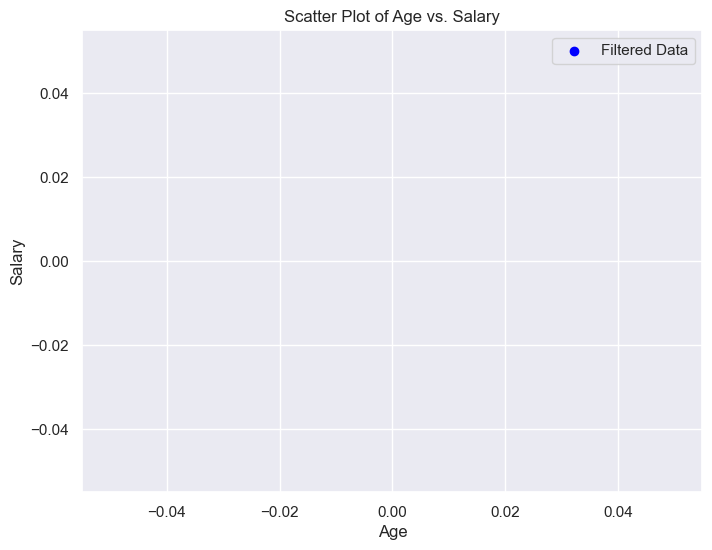

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['Age'], filtered_df['Salary'], c='blue', label='Filtered Data')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter Plot of Age vs. Salary')
plt.legend()
plt.grid(True)
plt.show()

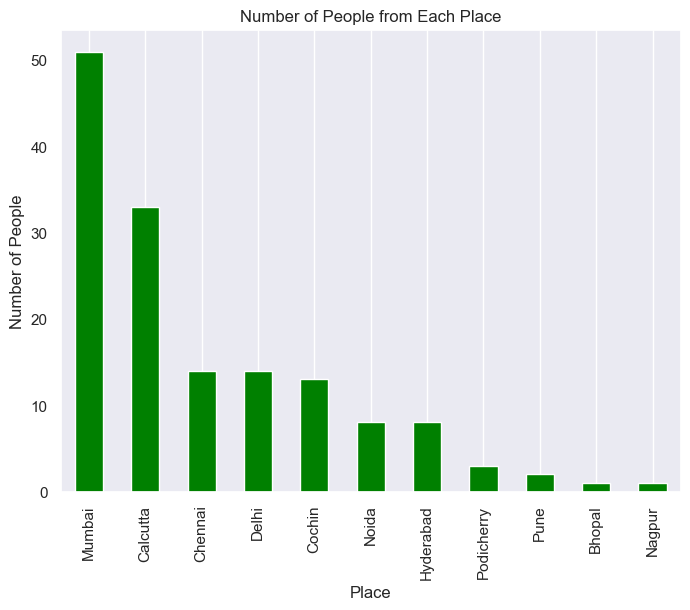

In [62]:
place_counts = df['Place'].value_counts()

plt.figure(figsize=(8, 6))
place_counts.plot(kind='bar', color='green')
plt.xlabel('Place')
plt.ylabel('Number of People')
plt.title('Number of People from Each Place')
plt.grid(axis='y')
plt.show()

In [71]:
df.drop_duplicates(inplace=True)

print("\nOriginal DataFrame After In-Place Removal of Duplicates:")
print(df)


Original DataFrame After In-Place Removal of Duplicates:
             Company     Age   Salary      Place Country  Gender  Agre
0                TCS  84.975  20289.0    Chennai   India     2.5  20.0
1            Infosys  84.975  20289.0     Mumbai   India     2.5  30.0
2                TCS  84.975  20289.0   Calcutta   India     2.5  35.0
3            Infosys  84.975  20289.0      Delhi   India     2.5  40.0
4                TCS  84.975  20289.0     Mumbai   India     2.5  23.0
..               ...     ...      ...        ...     ...     ...   ...
137              CTS  84.975  20289.0     Mumbai   India     2.5  31.0
138              CTS  84.975  20289.0     Cochin   India     2.5  44.0
139       Congnizant  84.975  20289.0      Noida   India     2.5  22.0
140          Infosys  84.975  20289.0  Hyderabad   India     2.5  44.0
142  Infosys Pvt Lmt  84.975  20289.0     Mumbai   India     2.5  22.0

[114 rows x 7 columns]
